In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
## Data collection and preprocessing

# loading the dataset into pandas DataFrame
data = pd.read_csv('gold_price_data.csv')

In [5]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
data.shape

(2290, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# Checking the number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# getting the statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [22]:
# Finding the correlation

correlation = data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<ipython-input-22-a11f377f557e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


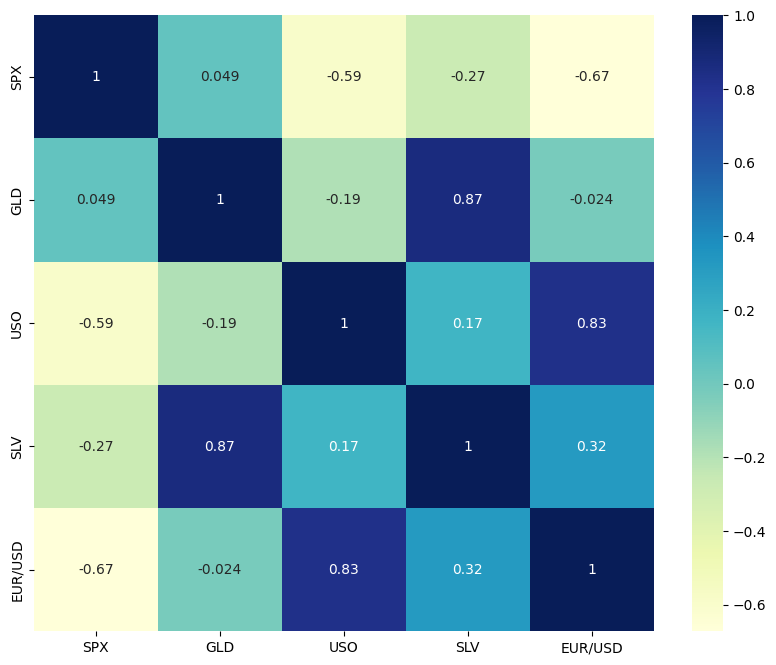

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
plt.show()

In [19]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


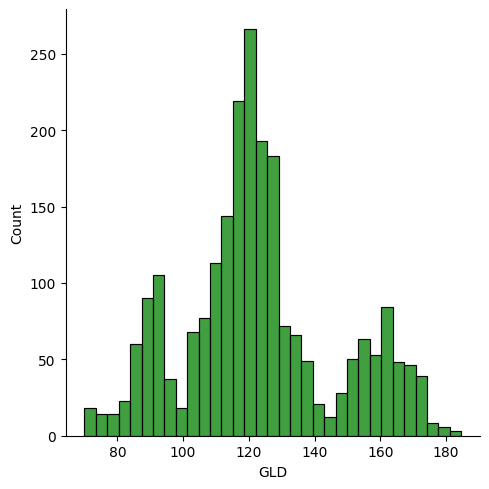

In [24]:
# Checking the distribution of the GLD Price

sns.displot(data['GLD'], color='green')

In [26]:
# Splitting the data into features and target

X = data.drop(['Date', 'GLD'], axis=1)
y = data['GLD']

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [31]:
# Splitting the data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [34]:
# Feature scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Creating the Model

model = RandomForestRegressor()

In [36]:
# Training the Model

model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
## Model Evaluation

# Prediction on test data
X_test_prediction = model.predict(X_test)

In [40]:
# R squared error

error_score = metrics.r2_score(y_test, X_test_prediction)
print(f'R squared error = {error_score}')

R squared error = 0.9892969437040561


In [41]:
model.score(X_test, y_test)

0.9892969437040561

In [42]:
# Comparing the actual values and predicted values in a plot

y_test = list(y_test)

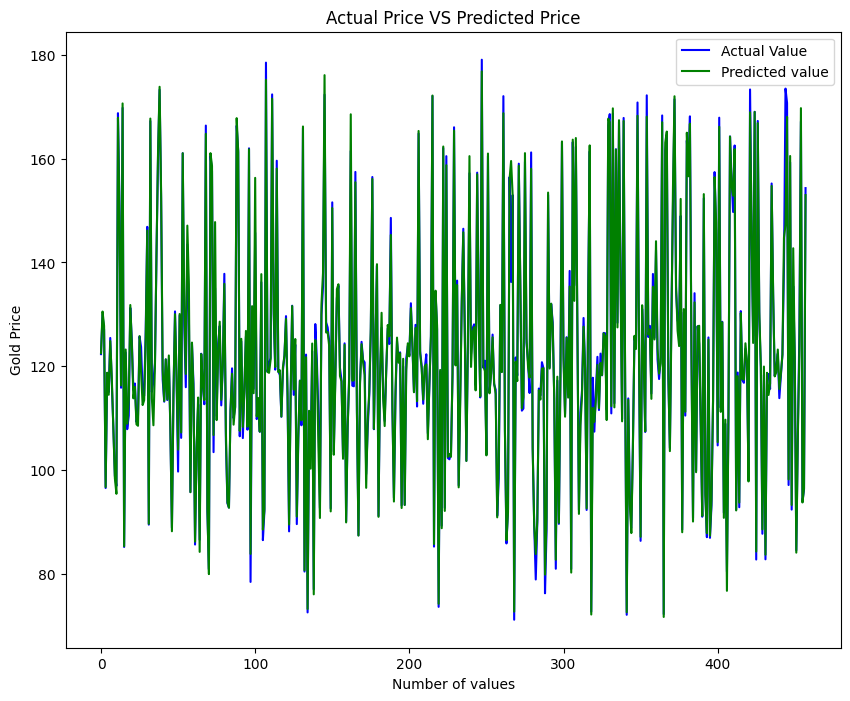

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(X_test_prediction, color='green', label='Predicted value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()